## Amazon Food Reviews Analysis NLP With Explaination

### Context

* This dataset consists of reviews of fine foods from amazon. The data span a period of more than 10 years, including all ~500,000 reviews up to October 2012. Reviews include product and user information, ratings, and a plain text review. It also includes reviews from all other Amazon categories.

### Attribute Information:
* Id ProductId - unique identifier for the product

* UserId - unqiue identifier for the user

* ProfileName

* HelpfulnessNumerator - number of users who found the review helpful

* HelpfulnessDenominator - number of users who indicated whether they found the review helpful or not

* Score - rating between 1 and 5

* Time - timestamp for the review

* Summary - brief summary of the review

* Text - text of the review

### WHAT THIS NOTEBOOK IS ALL ABOUT?
* Import Libraries and dataset
* Data Visualization
* Create Train and Test Datase
* Training Data With Logistic Regression
* Evalutaion

### import Libraries

In [1]:
import numpy as np   # support for large, multi-dimensional arrays and matrices
import pandas as pd   # for data manipulation and analysis
import matplotlib.pyplot as plt   # for data visualization
import seaborn as sns   # for data visualization

# a cloud filled with lots of words in different sizes, which represent the frequency or the importance of each word.
from wordcloud import WordCloud   # word cloud helps to visualize those words.        
import re   # Regular Expression, is a sequence of characters that forms a search pattern.
import string   #for string manipulation.

#text processing
from sklearn.model_selection import train_test_split   # split data into train and test
from sklearn.feature_extraction.text import CountVectorizer   # Scikit-learn’s CountVectorizer is used to convert a collection of text documents to a vector of term/token counts.   
from sklearn.pipeline import Pipeline   # Pipeline can be used to chain multiple estimators into one.
from sklearn.linear_model import LogisticRegression   # Classification algorithm
from sklearn.naive_bayes import MultinomialNB   # classification algorithm
from sklearn.metrics import accuracy_score, confusion_matrix  # visualization of the performance of an algorithm
import joblib   # save training model and load model

__CountVectorizer Work__
The CountVectorizer provides a simple way to both tokenize a collection of text documents and build a vocabulary of known words, but also to encode new documents using that vocabulary
<img src='countvectorizer.svg'>

__Word Cloud__ is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance. Significant textual data points can be highlighted using a word cloud. Word clouds are widely used for analyzing data from social network websites.

For generating word cloud in Python, modules needed are – matplotlib, pandas and wordcloud. To install these packages, run the following commands :

__!pip install wordcloud__

### Load the Dataset 

In [2]:
#Load the Review dataset into dataframe name df
df = pd.read_csv('Reviews.csv')

In [3]:
#Display the first five records of the dataset
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [13]:
df['analysis'] = df.Score.apply(lambda x: 'positive' if x >=3  else 'negative')

In [15]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,analysis
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,positive
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,negative
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,positive
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,negative
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,positive


In [49]:
x = df[['Score', 'Text']]
y = df['analysis']

In [50]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=33)

In [55]:
x_train['Text']

375980    I've been trying differant tea's to help me re...
499795    I was wondering why these were so much cheaper...
250454    My wife and I have 13 dogs, half of whom are o...
318886    Was introduced at Costco and the family liked ...
492671    Love this coffee and couldn't find it where I ...
                                ...                        
196665    This is my favorite "flacor" of Kind bars. It ...
158921    I hesitate to give this only three stars, beca...
223890    I enjoy a rich, robust cup of coffee, this cof...
393794    This boxed mix makes 2 round cakes, unlike the...
104152    Great coffee at a great price, i have no compl...
Name: Text, Length: 397917, dtype: object

295743

In [10]:
df[df['Score'] == 5]

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5,1340150400,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...
7,8,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,5,1336003200,"Wonderful, tasty taffy",This taffy is so good. It is very soft and ch...
8,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...
...,...,...,...,...,...,...,...,...,...,...
568448,568449,B001EO7N10,A1F6BHEYB7R6R7,James Braley,0,0,5,1308096000,Very large ground spice jars.,My only complaint is that there's so much of i...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...


## Data Cleaning

In [63]:
#Let's Look into the data type of the dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568438 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [64]:
# describe float and intger values
df.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,568454.000000,568454.000000,568454.00000,568454.000000,5.684540e+05
mean,284227.500000,1.743817,2.22881,4.183199,1.296257e+09
std,164098.679298,7.636513,8.28974,1.310436,4.804331e+07
min,1.000000,0.000000,0.00000,1.000000,9.393408e+08
25%,142114.250000,0.000000,0.00000,4.000000,1.271290e+09
50%,284227.500000,0.000000,1.00000,5.000000,1.311120e+09
75%,426340.750000,2.000000,2.00000,5.000000,1.332720e+09
max,568454.000000,866.000000,923.00000,5.000000,1.351210e+09


In [65]:
# describe a string values
a = df.dtypes[df.dtypes == 'object'].index
df[a].describe()

,ProductId,UserId,ProfileName,Summary,Text
count,568454,568454,568438,568427,568454
unique,74258,256059,218416,295742,393579
top,B007JFMH8M,A3OXHLG6DIBRW8,"C. F. Hill ""CFH""",Delicious!,"This review will make me sound really stupid, ..."
freq,913,448,451,2462,199


In [66]:
#Chacking for Null Values
df.isnull().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName               16
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

In [67]:
#check for the duplicate fields
df.duplicated().sum()

0

* Here we see no duplicate values. But if we see the data, We can see that Customer with Profile Name 'Geetha Krishnan' had given same score at same time with same summary and Text its duplicacy of data , so we need to drop it not only with Score but also with same Time, Summary.

In [68]:
# check Score is not eqaul to 3 nad userid equal to AR5J8UI46CURR
[(df['Score']!=3) & (df['UserId']=='AR5J8UI46CURR')]

[0         False
 1         False
 2         False
 3         False
 4         False
           ...  
 568449    False
 568450    False
 568451    False
 568452    False
 568453    False
 Length: 568454, dtype: bool]

In [69]:
#dropping duplicates with mulitple same features
df_final = df.drop_duplicates(subset=['UserId','ProfileName','Score','Time','Summary','Text'],keep='first')

In [70]:
# Information
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395200 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      395200 non-null  int64 
 1   ProductId               395200 non-null  object
 2   UserId                  395200 non-null  object
 3   ProfileName             395189 non-null  object
 4   HelpfulnessNumerator    395200 non-null  int64 
 5   HelpfulnessDenominator  395200 non-null  int64 
 6   Score                   395200 non-null  int64 
 7   Time                    395200 non-null  int64 
 8   Summary                 395197 non-null  object
 9   Text                    395200 non-null  object
dtypes: int64(5), object(5)
memory usage: 33.2+ MB


### Let's View the Product Details

#### How to determine if a review is positive or negative?

Till now we saw that 5-star reviews constitute a large proportion of all reviews. 

The next most prevalent rating is 4-stars, followed by 1-star, 3-star, and finally 2-star reviews.

- We Can cunsider 5 & 4 as Positive - Highly satisfied
- 1 & 2  as Negative - Highly dissatisfied
- 3 - Median Satisfied

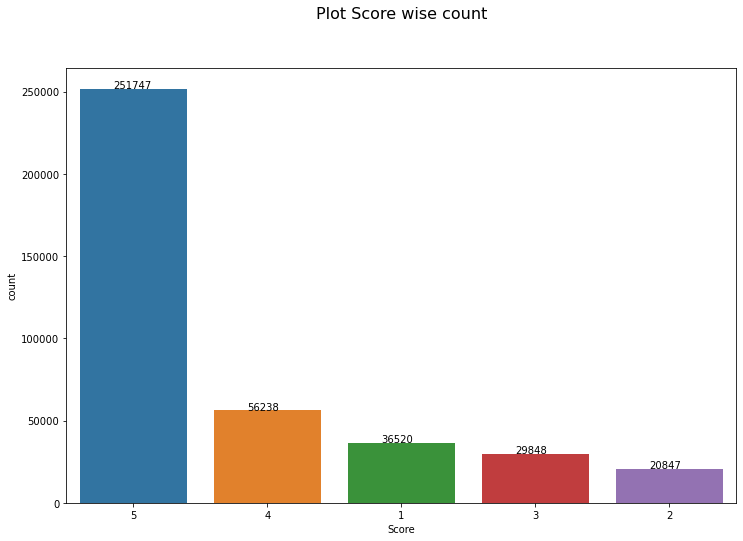

In [71]:
# Distribution of Score

plt.figure(figsize=(12,8))
plt.title("Plot Score wise count", y = 1.1, size = 16)

#sns.countplot(x='Score', data=df)
ax = sns.countplot(x=df_final["Score"],  data=df_final, order = df_final["Score"].value_counts().index )

#highlight the total count value of scores in the plot
for p, label in zip(ax.patches, df_final["Score"].value_counts()):

    ax.annotate(label, (p.get_x()+0.25, p.get_height()+0.25))


#### Data preview
This study is to see whether there is pattern found for unpopular (downvote) comments by users (might be used to boost sales). We will be focusing on score 5 reviews, and get rid of comments with neutral votes:

In [72]:
# how many counts in 5 score
df_final[df_final['Score'] == 5].count()

Id                        251747
ProductId                 251747
UserId                    251747
ProfileName               251740
HelpfulnessNumerator      251747
HelpfulnessDenominator    251747
Score                     251747
Time                      251747
Summary                   251747
Text                      251747
dtype: int64

In [73]:
df_final.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


### Let's View the Product Details

#### Data Visualization

In [76]:
df_products = df_final.groupby('ProductId').filter(lambda x: len(x) >= 500)
df_product_groups = df_products.groupby('ProductId')
print(len(df_products))
print('Count of Product groups',len(df_product_groups))

6513
Count of Product groups 11


There are 11 groups of ProductID which has reviews of more than or equal to 500, means 11 products leads to the maximum sale of the Products

Text(0.5, 1.05, 'Product Id with respect to scores count')

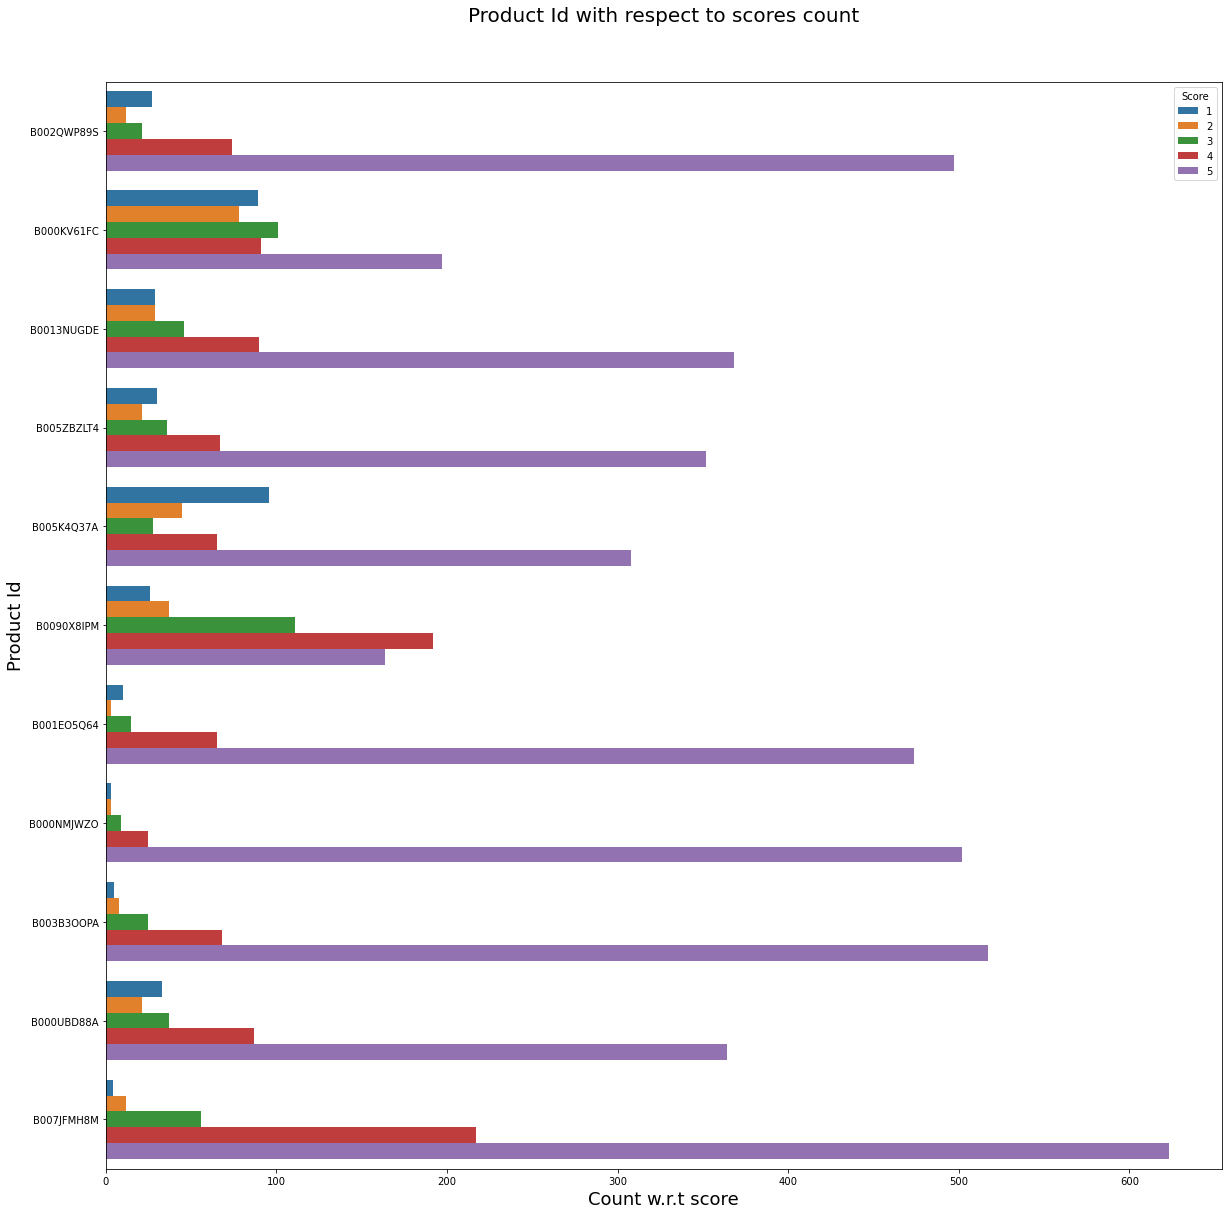

In [77]:
plt.figure(figsize=(20,20))
sns.countplot(y="ProductId",  hue="Score", data=df_products, )
plt.ylabel('Product Id', y=0.5, size = 18)
plt.xlabel('Count w.r.t score', size = 18)
plt.title("Product Id with respect to scores count", y=1.05, size = 20)

In [78]:
#ProductId with respective Scores
df_product_groups.count()['Score'].sort_values(ascending=False)

ProductId
B007JFMH8M    912
B002QWP89S    631
B003B3OOPA    623
B001EO5Q64    567
B0013NUGDE    562
B000KV61FC    556
B000NMJWZO    542
B000UBD88A    542
B005K4Q37A    542
B0090X8IPM    530
B005ZBZLT4    506
Name: Score, dtype: int64

#### From the above chart and group it is viwed that the most reviwed Product B007JFMH8M  has highest score 

### Now Let's look into the Time Column

We see that data in the attribut TIME is not in readable format. So let's convert the time into readable format

In [79]:
df_final['Time'] = pd.to_datetime(df_final['Time'], unit='s')

# sorting the dataset on the basis of Time
df_final.sort_values(by='Time')

<ipython-input-79-28bdedead8fa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['Time'] = pd.to_datetime(df_final['Time'], unit='s')


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
150523,150524,0006641040,ACITT7DI6IDDL,shari zychinski,0,0,5,1999-10-08,EVERY book is educational,this witty little book makes my son laugh at l...
150500,150501,0006641040,AJ46FKXOVC7NR,Nicholas A Mesiano,2,2,5,1999-10-25,This whole series is great way to spend time w...,I can remember seeing the show when it aired o...
451855,451856,B00004CXX9,AIUWLEQ1ADEG5,Elizabeth Medina,0,0,5,1999-12-02,Entertainingl Funny!,Beetlejuice is a well written movie ..... ever...
230284,230285,B00004RYGX,A344SMIA5JECGM,Vincent P. Ross,1,2,5,1999-12-06,A modern day fairy tale,"A twist of rumplestiskin captured on film, sta..."
451854,451855,B00004CXX9,AJH6LUC1UT1ON,The Phantom of the Opera,0,0,5,2000-01-03,FANTASTIC!,Beetlejuice is an excellent and funny movie. K...
...,...,...,...,...,...,...,...,...,...,...
538395,538396,B0061IUIDY,A2L6QS8SVHT9RG,"randomartco ""period film aficionado""",0,0,4,2012-10-26,Good standard English breakfast - decent brand!,This English Breakfast tea from Higgins & Burk...
538396,538397,B0061IUIDY,A36MS27KAA5S26,"Katherine Berry ""of &#34;Housewife How To's&#34;""",0,0,4,2012-10-26,"Nice tea, not as strong as the stuff from the ...",I love all sorts of teas. My friends know this...
282997,282998,B0068ZWDG0,A18SSQCUXS47D1,Denise,0,0,5,2012-10-26,Was bummed!,I was bummed that I might run out of this favo...
487719,487720,B00816PNK2,ABDQA93G2GTXC,Sheila Fox,0,0,5,2012-10-26,This is so good!,I purchased this after my sister sent a small ...


### Score Evaluation

If score is 1,2 then we can assume that its negative score and if its 4,5 then its positive score=3 is neither positive nor negative so we will not consider it

In [80]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395200 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   Id                      395200 non-null  int64         
 1   ProductId               395200 non-null  object        
 2   UserId                  395200 non-null  object        
 3   ProfileName             395189 non-null  object        
 4   HelpfulnessNumerator    395200 non-null  int64         
 5   HelpfulnessDenominator  395200 non-null  int64         
 6   Score                   395200 non-null  int64         
 7   Time                    395200 non-null  datetime64[ns]
 8   Summary                 395197 non-null  object        
 9   Text                    395200 non-null  object        
dtypes: datetime64[ns](1), int64(4), object(5)
memory usage: 41.2+ MB


### Assigning 'Sentiment_Class' Feature
###### Score > 3 (4,5) -> Positive
###### Score < 3 (1,2) -> Negative

In [82]:
df_final.loc[df_final["Score"] > 3, 'Sentiment_Class'] = 'Positive'
df_final.loc[df_final["Score"] < 3, 'Sentiment_Class'] = 'Negative'

C:\Users\Mihir Dholakiya\anaconda3\lib\site-packages\pandas\core\indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
C:\Users\Mihir Dholakiya\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\Mihir Dholakiya\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

In [83]:
df_final

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Sentiment_Class
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-27,Good Quality Dog Food,I have bought several of the Vitality canned d...,Positive
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,2012-09-07,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,Negative
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,2008-08-18,"""Delight"" says it all",This is a confection that has been around a fe...,Positive
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,2011-06-13,Cough Medicine,If you are looking for the secret ingredient i...,Negative
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,2012-10-21,Great taffy,Great taffy at a great price. There was a wid...,Positive
...,...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,2011-03-09,Will not do without,Great for sesame chicken..this is a good if no...,Positive
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,2012-03-09,disappointed,I'm disappointed with the flavor. The chocolat...,Negative
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,2012-02-21,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o...",Positive
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,2012-03-13,Favorite Training and reward treat,These are the BEST treats for training and rew...,Positive


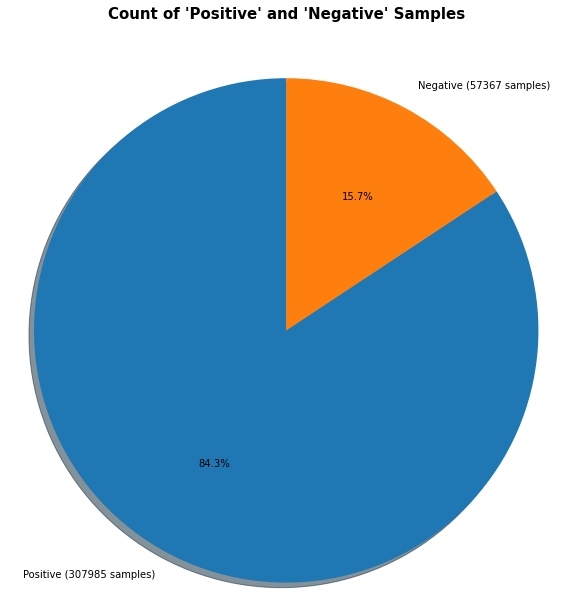

In [84]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = [f'{k} ({df_final["Sentiment_Class"].value_counts()[k]} samples)' for k in df_final['Sentiment_Class'].value_counts().keys()]
sizes = dict(df_final['Sentiment_Class'].value_counts())
sizes = sizes.values()

fig1, ax1 = plt.subplots(figsize=(10,10));
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title("Count of 'Positive' and 'Negative' Samples", pad=40, fontweight='bold', fontsize=15)
plt.show();

#### Observations:
Positive reviews are more common than negative reviews.

In [85]:
# unique values with respective counts
df_final['Score'].value_counts()

5    251747
4     56238
1     36520
3     29848
2     20847
Name: Score, dtype: int64

#### Display data as an image
>The matplotlib function imshow() creates an image from a 2-dimensional numpy array. The image will have one square for each element of the array. The color of each square is determined by the value of the corresponding array element and the color map used by imshow() 
[Know More](https://plotly.com/python/imshow/)

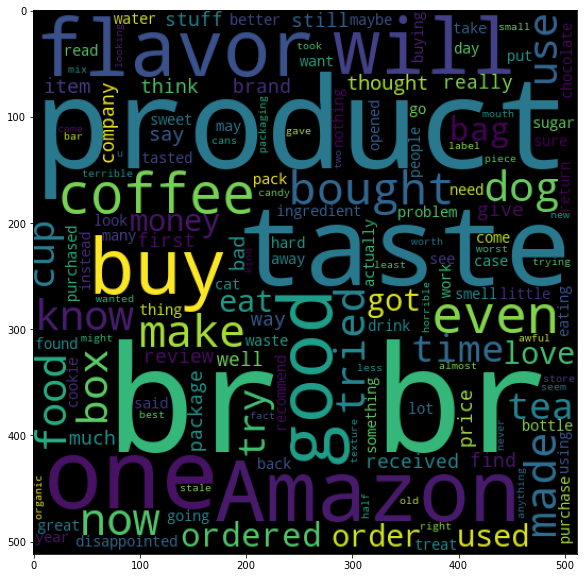

In [86]:
# using wordcloud 
#To display data as image we use plt.imshow() to display the maximum used words in the review
positive = ''.join(list(df_final[df_final['Score'] == 1]['Text']))
positive_wc = WordCloud(width=512, height=512, max_words=150).generate(positive)
plt.gcf().set_size_inches(14, 10)
plt.imshow(positive_wc)

### Text Data Cleaning

In [87]:
#Remove punctuation from data
def text_cleaning(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W", " ", text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    
    return text
   

In [ ]:
# from nltk.corpus import stopwords

# def text_process(mess):
#     """
#     Takes in a string of text, then performs the following:
#     1. Remove all punctuation
#     2. Remove all stopwords
#     3. Returns a list of the cleaned text
#     """
#     # Check characters to see if they are in punctuation
#     nopunc = [char for char in mess if char not in string.punctuation]

#     # Join the characters again to form the string.
#     nopunc = ''.join(nopunc)
    
#     # Now just remove any stopwords
#     return ' '.join([word for word in nopunc.split() if word.lower() not in stopwords.words('english')])

In [88]:
# apply function to if score is greaterthan 3 so value is 1(postive) and score is less than or equal to 3 score is 0(negative) 
df_final['Score'] = df_final['Score'].apply(lambda x: 1 if x > 3 else 0 )

<ipython-input-88-f929a414ecd3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['Score'] = df_final['Score'].apply(lambda x: 1 if x > 3 else 0 )


In [89]:
#showing function work or not
df_final = df_final[['Score', 'Text']]

In [90]:
df_final

,Score,Text
0,1,I have bought several of the Vitality canned d...
1,0,Product arrived labeled as Jumbo Salted Peanut...
2,1,This is a confection that has been around a fe...
3,0,If you are looking for the secret ingredient i...
4,1,Great taffy at a great price. There was a wid...
...,...,...
568449,1,Great for sesame chicken..this is a good if no...
568450,0,I'm disappointed with the flavor. The chocolat...
568451,1,"These stars are small, so you can give 10-15 o..."
568452,1,These are the BEST treats for training and rew...


In [91]:
# apply function text cleaning to remove text punctuation
df_final['Text'] = df_final['Text'].apply(text_cleaning)

<ipython-input-91-d6e7b39a1f0a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['Text'] = df_final['Text'].apply(text_cleaning)


In [92]:
df_final

,Score,Text
0,1,i have bought several of the vitality canned d...
1,0,product arrived labeled as jumbo salted peanut...
2,1,this is a confection that has been around a fe...
3,0,if you are looking for the secret ingredient i...
4,1,great taffy at a great price there was a wid...
...,...,...
568449,1,great for sesame chicken this is a good if no...
568450,0,i m disappointed with the flavor the chocolat...
568451,1,these stars are small so you can give of th...
568452,1,these are the best treats for training and rew...


### Splitting  Data

In [93]:
# split data into x and y
x = df_final['Text']
y = df_final['Score']

In [94]:
# spliting data into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=333)

In [95]:
y_train.unique()

array([0, 1], dtype=int64)

In [96]:
x_train

561796    the coffee has no vanilla flavor that i could ...
14135     my ten year old dachshund loves these  how muc...
167813    my dog has had some skin issues  about a month...
176507    the pump would not screw all the way down onto...
85179     it is a strong eye opener  the weak at heart s...
                                ...                        
185305    if the apricot seeds you are eating are not bi...
553462    this product is great if you eat too much at a...
406707    i was looking for a tea that would help me wit...
197029    i bought these for my two year old  they re gr...
469657    i used one of the   oz mccormick steak rub on ...
Name: Text, Length: 316160, dtype: object

In [97]:
# Pipeline can be used to chain multiple estimators into one.
pipe = Pipeline([('cv', CountVectorizer()),
                 ('model', LogisticRegression(max_iter=100000))])

In [98]:
# train model 
pipe.fit(x_train, y_train)

Pipeline(steps=[('cv', CountVectorizer()),
                ('model', LogisticRegression(max_iter=100000))])

In [99]:
# test model on x_test
y_pred = pipe.predict(x_test)

In [101]:
acc = accuracy_score(y_test, y_pred)

0.8905111336032389

In [ ]:
### Creating pickle file for Web application

In [210]:
# save model to .pkl
joblib.dump(pipe, 'amazon_review.pkl')

['amazon_review.pkl']

In [3]:
model = joblib.load('amazon_review.pkl')

C:\Users\Mihir Dholakiya\anaconda3\lib\site-packages\sklearn\base.py:310: UserWarning: Trying to unpickle estimator CountVectorizer from version 0.23.2 when using version 0.24.1. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
C:\Users\Mihir Dholakiya\anaconda3\lib\site-packages\sklearn\base.py:310: UserWarning: Trying to unpickle estimator LogisticRegression from version 0.23.2 when using version 0.24.1. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
C:\Users\Mihir Dholakiya\anaconda3\lib\site-packages\sklearn\base.py:310: UserWarning: Trying to unpickle estimator Pipeline from version 0.23.2 when using version 0.24.1. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


In [5]:
model.predict(['food is not testy please do not buy it', 5])

array([0], dtype=int64)

# Using MultiNomialNB

In [222]:
cv = CountVectorizer(ngram_range=(1,2),stop_words='english')

In [223]:
x_train = cv.fit_transform(x_train)

In [226]:
nb = MultinomialNB()
nb.fit(x_train,y_train)
pred_2=nb.predict(cv.transform(x_test))
score_2=accuracy_score(y_test,pred_2)


In [229]:
score_2

0.8591725708502024

In [231]:
con2 = confusion_matrix(y_test, pred_2)
con2

array([[ 7060, 10346],
       [  785, 60849]], dtype=int64)

In [234]:
 joblib.dump(nb, 'amazon_review_2.pkl')

['amazon_review_2.pkl']

In [235]:
model2 = joblib.load('amazon_review_2.pkl')

In [236]:
model2.predict(cv.transform(['this product is very bad do not buy it']))

array([0], dtype=int64)

# heading
- songle